In [1]:
import os
import sys
sys.path.append("../../")
from imp import reload

import Reader
import toolkit
import visualization
import GearboxFaultDetector

Using TensorFlow backend.
D:\Software\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# reload(Reader)

In [3]:
feature_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\feature\niu_jia_ling"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\niu_jia_ling"
wind_turbine = "2"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature, speed=speed)

feature.shape: (4258, 25)
speed.shape: (4258, 1)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

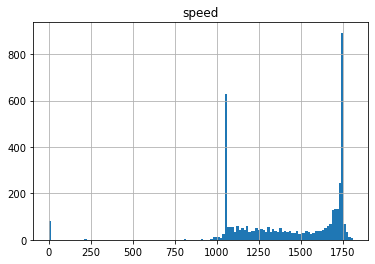

In [5]:
speed.hist(bins=128)

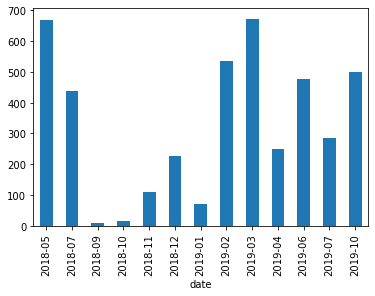

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
feature_train = feature["2018-05": "2019-04"]
speed_train = speed["2018-05": "2019-04"]

feature_test = feature["2019-06": "2019-10"]
speed_test = speed["2019-06": "2019-10"]

toolkit.print_shape(feature_train=feature_train, speed_train=speed_train, feature_test=feature_test, speed_test=speed_test)

feature_train.shape: (2996, 25)
speed_train.shape: (2996, 1)
feature_test.shape: (1262, 25)
speed_test.shape: (1262, 1)


In [8]:
detector = GearboxFaultDetector.GearboxFaultDetector()

In [9]:
detector.fit(feature_train, speed_train)

feature.shape: (2888, 25)
low_feature.shape: (782, 25)
mid_feature.shape: (446, 25)
high_feature.shape: (1660, 25)


ValueError: The number of neurons should not exceed the number of features

In [ ]:
detector.decision_scores.plot()

In [ ]:
anomaly_scores = detector.decision_function(feature_test, speed_test)

In [ ]:
anomaly_scores.plot()

In [ ]:
speed_test[speed_test.index.isin(anomaly_scores[anomaly_scores[0] >= 4].index)].hist()